<a href="https://colab.research.google.com/github/Bharti1234bisht/projects/blob/main/Wine_Qualityproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# White wine qality priditiction



# Objective-to check quality of wine



# Data source ybi foundation

## Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

# Import Data

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv', sep=';')

# Data visualization

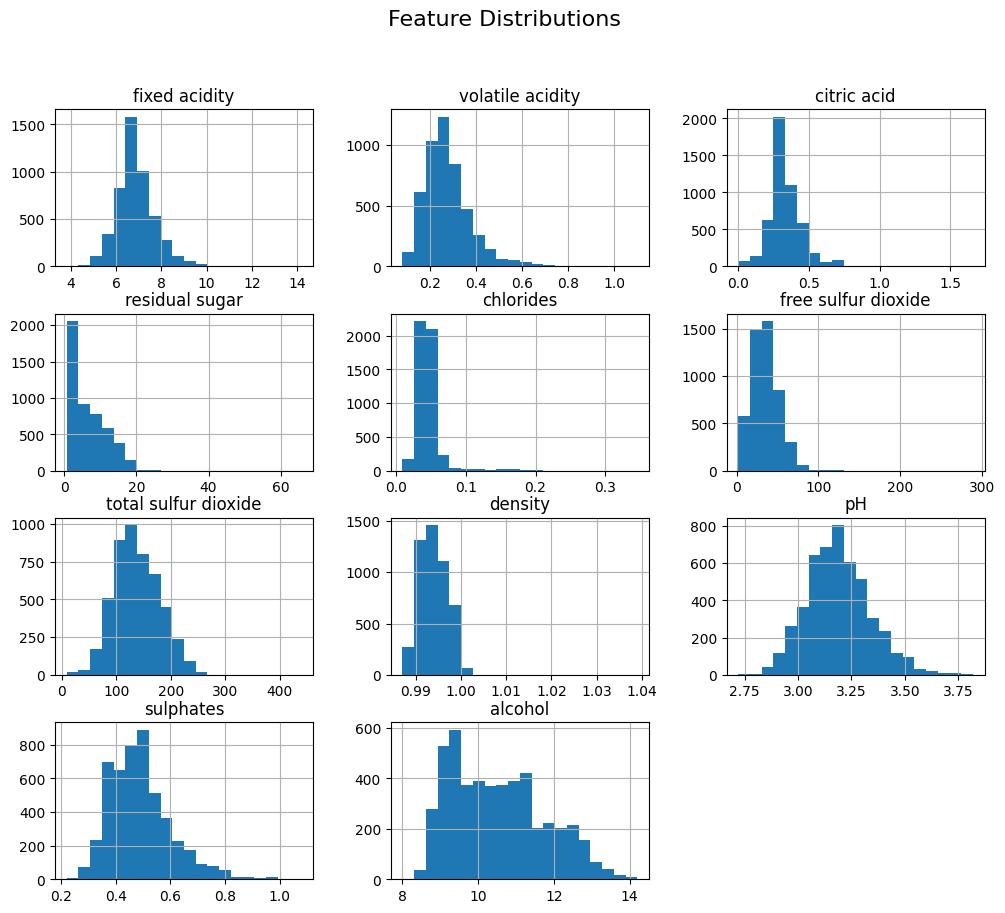

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
df.drop('quality', axis=1).hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Describe Data

---


this dataset contain 12 variable

"fixed acidity"

"volatile acidity"

"citric acid"

"residual sugar"

"chlorides"

"free sulfur dioxide"

"total sulfur dioxide"

"density"

"pH"

"sulphates"

"alcohol"

"quality"



# data exploration

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.shape

(4898, 12)

In [9]:
df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [10]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


# Define Y and X

In [11]:
y = df['quality']

In [12]:
y.shape

(4898,)

In [13]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [14]:
x = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

In [15]:
x = df.drop(['quality'], axis=1)

In [16]:
x.shape

(4898, 11)

In [17]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


# Get X Variables strandardized or data  preprocession

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()

In [20]:
X = ss.fit_transform(x)

In [21]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


# Train Test Split Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,random_state = 12529)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

# Get Model Train

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC()

In [27]:
svc.fit(x_train,y_train)

SVC()

# Get Model Prediction

In [28]:
y_pred = svc.predict(x_test)

In [29]:
y_pred.shape

(1470,)

In [30]:
y_pred

array([6, 6, 6, ..., 6, 6, 6])

# Get Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   1   3   0   0   0]
 [  0   0   2  45   0   0   0]
 [  0   0  12 414   0   0   0]
 [  0   0  14 660   0   0   0]
 [  0   0   0 264   0   0   0]
 [  0   0   0  53   0   0   0]
 [  0   0   0   2   0   0   0]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        47
           5       0.41      0.03      0.05       426
           6       0.46      0.98      0.62       674
           7       0.00      0.00      0.00       264
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         2

    accuracy                           0.46      1470
   macro avg       0.12      0.14      0.10      1470
weighted avg       0.33      0.46      0.30      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Get Model Re-run with Two Class Created for Wine Quality

In [34]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [35]:
y.value_counts()

,count
quality,
1,3258
0,1640


# Train Test Split Data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,random_state = 12529)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

# Get Model Train

In [39]:
from sklearn.svm import SVC

In [40]:
svc = SVC()

In [41]:
svc.fit(x_train,y_train)

SVC()

# Get Model Prediction

In [42]:
y_pred = svc.predict(x_test)

In [43]:
y_pred.shape

(1470,)

In [44]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# Get Model Evaluation

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
print(confusion_matrix(y_test, y_pred))

[[  1 476]
 [  1 992]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00       477
           1       0.68      1.00      0.81       993

    accuracy                           0.68      1470
   macro avg       0.59      0.50      0.41      1470
weighted avg       0.62      0.68      0.55      1470



# Get Future Predictions

In [48]:
df_new = df.sample(1)

In [49]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3227,6.8,0.27,0.37,8.2,0.055,52.0,192.0,0.99586,3.11,0.52,9.5,6


In [50]:
df_new.shape

(1, 12)

In [51]:
x_new = df_new.drop(['quality'],axis=1)

In [52]:
x_new = ss.fit_transform(x_new)

In [53]:
y_pred_new = svc.predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [54]:
y_pred_new

array([1])

# Explanation
here we use Support Vector Machine (SVM) Model
Support Vector Classifier (SVC):
An SVM model is used to predict the quality of the wine. SVM is a powerful algorithm for classification that works by finding a hyperplane that best separates different classes (in this case, the quality of wine).
The SVC() model is created and trained (fit()) using the training data (x_train and y_train).
SVM works by:
Maximizing the margin between classes while minimizing classification errors. For non-linear data, a kernel trick is used to map the data into higher-dimensional space to make it linearly separable.
 Model Prediction
After training, the model is used to make predictions on the test set (x_test), which are stored in y_pred.
The model predicts a class for each test sample, which is the quality rating (a value between 3 and 9). For simplicity, the model is predicted for the new sample (df_new).
 Model Evaluation
Confusion Matrix: The confusion matrix is used to evaluate the model's performance by comparing the predicted values (y_pred) with the actual values (y_test). This gives insights into how many predictions were correct or incorrect for each class.
Classification Report: The classification report provides more detailed performance metrics like precision, recall, and f1-score for each class. These metrics help assess how well the model is performing for each quality rating.
Precision: The percentage of correct positive predictions for a specific class.
Recall: The percentage of actual positives correctly identified by the model.
F1-Score: The harmonic mean of precision and recall, giving a balanced measure.
You also see warnings for precision being ill-defined for some classes (like 3, 8, and 9), because the model didn't predict any samples for these classes.
